In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv


In [10]:
pip install sentence-transformers pandas scikit-learn numpy --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

2025-05-20 05:29:02.297599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747718942.703963      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747718942.808051      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
df = pd.read_csv("/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv")
df = df[['Resume', 'Category']].dropna()

le = LabelEncoder()
df['label'] = le.fit_transform(df['Category'])

X_train, X_test, y_train, y_test = train_test_split(
    df['Resume'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)


In [5]:
#  Load Sentence-BERT model (no transformers)
model = SentenceTransformer('all-MiniLM-L6-v2')  # small + fast

X_train_embeddings = model.encode(X_train.tolist(), show_progress_bar=True)
X_test_embeddings = model.encode(X_test.tolist(), show_progress_bar=True)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_embeddings, y_train)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

LogisticRegression(max_iter=1000)

In [7]:
y_pred = clf.predict(X_test_embeddings)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))



Accuracy: 96.37%

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       0.58      1.00      0.74         7
       Automation Testing       0.80      0.80      0.80         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      0.40      0.57         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
                   

In [8]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Weighted Precision: {precision * 100:.2f}%")
print(f"Weighted Recall: {recall * 100:.2f}%")
print(f"Weighted F1-score: {f1 * 100:.2f}%")


Weighted Precision: 97.51%
Weighted Recall: 96.37%
Weighted F1-score: 96.25%


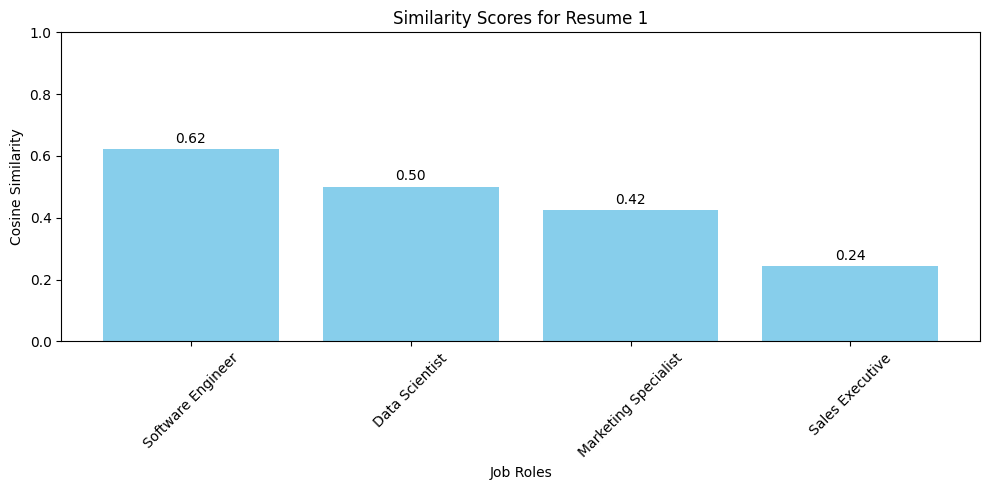

In [13]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

resumes = [
    "Experienced software developer with knowledge in Python and ML.",
    "Marketing professional with 5 years in digital marketing."
]

job_roles = [
    "Software Engineer",
    "Data Scientist",
    "Marketing Specialist",
    "Sales Executive"
]

model = SentenceTransformer('all-MiniLM-L6-v2')

resume_embeddings = model.encode(resumes, show_progress_bar=False)
job_embeddings = model.encode(job_roles, show_progress_bar=False)

# Compute similarity matrix
similarity_matrix = cosine_similarity(resume_embeddings, job_embeddings)


sample_index = 0 

similarity_scores = similarity_matrix[sample_index]
sorted_indices = np.argsort(similarity_scores)[::-1]
sorted_scores = similarity_scores[sorted_indices]
sorted_labels = [job_roles[i] for i in sorted_indices]

plt.figure(figsize=(10, 5))
bars = plt.bar(sorted_labels, sorted_scores, color='skyblue')
plt.title(f"Similarity Scores for Resume {sample_index + 1}")
plt.xlabel("Job Roles")
plt.ylabel("Cosine Similarity")
plt.ylim(0, 1)
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center')

plt.tight_layout()
plt.show()

